## Question D
Build a multi-layer perceptron network.  The input is the 784-dimensional vector, 28x28=784.  Use two hidden layers of 256 and 256 neurons each.  The output layer is 10.  The activations functions are all linear.

### Question D.1
[5] Build the model, and tune the learning rate to make sure that the training converges.  Using the same cross-validation as in (B).

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
numPixels = 784
firstLayerOutput = 256
secondLayerOutput = 256
numClassifications = 10

# Initial input
x = tf.placeholder(tf.float32, [None, numPixels])
# Reference
ref = tf.placeholder(tf.float32, [None, numClassifications])

logits1 = tf.layers.dense(inputs=x, units=firstLayerOutput, activation=tf.nn.relu, name="L1")
logits2 = tf.layers.dense(inputs=logits1, units=secondLayerOutput, activation=tf.nn.relu, name="L2")
logits3 = tf.layers.dense(inputs=logits2, units=numClassifications, activation=tf.nn.relu, name="L3")

# # First layer
# # -------------

# # First weight variable
# W1 = tf.Variable(tf.zeros([numPixels, firstLayerOutput]))
# # First bias variable
# b1 = tf.Variable(tf.zeros([firstLayerOutput]))
# # First layer calculation. N x 256 size
# logits1 = tf.matmul(x, W1) + b1")

# # Second layer
# # -------------

# # Second weight variable
# W2 = tf.Variable(tf.zeros([firstLayerOutput, secondLayerOutput]))
# # Second bias variable
# b2 = tf.Variable(tf.zeros([secondLayerOutput]))
# # Third layer calculation. N x 256 size
# logits2 = tf.matmul(logits1, W2) + b2

# # Third layer
# # -------------

# # Third weight variable
# W3 = tf.Variable(tf.zeros([secondLayerOutput, numClassifications]))
# # Third bias variable
# b3 = tf.Variable(tf.zeros([numClassifications]))
# # Third layer calculation. N x 10 size
# logits3 = tf.matmul(logits2, W3) + b3

# Calculate the cross entropy, doing the softmax function internally
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits3, labels=ref)

# Take the average of the cross entropy values
cost = tf.reduce_mean(cross_entropy)

# (N). Take the highest percentile value in the prediction as the answer
prediction = tf.argmax(tf.nn.softmax(logits3), axis=1)

labels = []
for label in mnist.test.labels:
    labels.append(np.argmax(label))
labels = np.array(labels)

rate = 0.1
epochs = 1000

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

errList = []
validationErrList = []
epochList = []
inputData, correctAns = mnist.train.next_batch(100)
validationInput, validationCorrect = mnist.train.next_batch(100)

for i in range(epochs):
    # Do the training
    err, _ = s.run((cost, optimizer), feed_dict={x: inputData, ref: correctAns})
    
    # Do the validation
    validationErr = s.run((cost), feed_dict={x: validationInput, ref: validationCorrect})
    validationErrList.append(validationErr)
            
    errList.append(err)
    epochList.append(i)

print("DONE")

DONE


### Question D.2
[5] Plot the training error over the epochs.

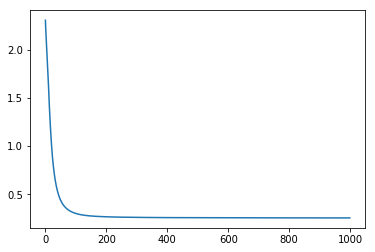

In [3]:
plt.plot(epochList, errList);
plt.show()

### Question D.3
[5] Plot the cross-validation error over the epochs. Is there overfitting?  Explain.

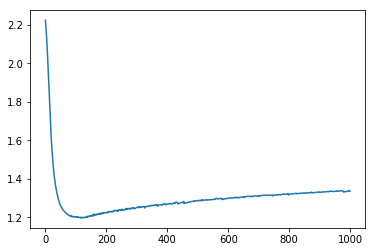

In [4]:
plt.plot(epochList, validationErrList);
plt.show()

There is overfitting which can be seen at around epoch 100 (from the graph). When the error starts increasing in the above plot, it can be seen that there is overfitting happening. Meaning that the training algorithm is too specific to the training data and should stop training on that data. Due to the increased layers and neurons, it would appear that it is trying correct itself to a degree since the curve is not smooth. However since the number of epochs increases, the training gets more and more specific to the training data hence the error increases even though the increased layers/neurons try to correct for that.

### Question D.4
[5] Report the test error, and compare with (B.4).  Comment on your observation.

In [5]:
# Check the test error
predic = s.run((prediction), feed_dict={x: mnist.test.images})
answers = np.equal(labels, predic)
corrGuesses = np.sum(answers)
testErr = corrGuesses / len(answers)   
print("The test error for the final iteration of the training is: " + str((1 - testErr) * 100) + " percent.")

The test error for the final iteration of the training is: 36.46 percent.


The test error has decreased by a slight amount from 40-50 percent down to 30-35 percent.